In [1]:
!pip install numpy pandas gym tensorflow torch stable-baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 28.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 32.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 40.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB

In [3]:
import pandas as pd
import numpy as np

# Load your OHLCV data
data = pd.read_csv('MGOL_data.xml.csv')

In [4]:
data

,symbol,frame,datetime,open,high,low,close,volume
0,MGOL,1m,2/7/25 1:00,0.3106,0.3599,0.3106,0.3386,24030
1,MGOL,1m,2/7/25 1:01,0.3386,0.3388,0.3265,0.3265,11337
2,MGOL,1m,2/7/25 1:02,0.3290,0.3352,0.3240,0.3288,8203
3,MGOL,1m,2/7/25 1:03,0.3251,0.3275,0.3080,0.3123,8875
4,MGOL,1m,2/7/25 1:04,0.3124,0.3180,0.3110,0.3124,5318
...,...,...,...,...,...,...,...,...
955,MGOL,1m,2/7/25 16:55,0.4299,0.4361,0.4299,0.4349,929
956,MGOL,1m,2/7/25 16:56,0.4348,0.4350,0.4300,0.4301,641
957,MGOL,1m,2/7/25 16:57,0.4300,0.4350,0.4299,0.4343,1206
958,MGOL,1m,2/7/25 16:58,0.4330,0.4345,0.4201,0.4299,2203


In [5]:
# Split the 'datetime' column into 'date' and 'time'
data[['date', 'time']] = data['datetime'].str.split(' ', expand=True)

print(data)

    symbol frame      datetime    open    high     low   close  volume  \
0     MGOL    1m   2/7/25 1:00  0.3106  0.3599  0.3106  0.3386   24030   
1     MGOL    1m   2/7/25 1:01  0.3386  0.3388  0.3265  0.3265   11337   
2     MGOL    1m   2/7/25 1:02  0.3290  0.3352  0.3240  0.3288    8203   
3     MGOL    1m   2/7/25 1:03  0.3251  0.3275  0.3080  0.3123    8875   
4     MGOL    1m   2/7/25 1:04  0.3124  0.3180  0.3110  0.3124    5318   
..     ...   ...           ...     ...     ...     ...     ...     ...   
955   MGOL    1m  2/7/25 16:55  0.4299  0.4361  0.4299  0.4349     929   
956   MGOL    1m  2/7/25 16:56  0.4348  0.4350  0.4300  0.4301     641   
957   MGOL    1m  2/7/25 16:57  0.4300  0.4350  0.4299  0.4343    1206   
958   MGOL    1m  2/7/25 16:58  0.4330  0.4345  0.4201  0.4299    2203   
959   MGOL    1m  2/7/25 16:59  0.4290  0.4295  0.4002  0.4003    3442   

       date   time  
0    2/7/25   1:00  
1    2/7/25   1:01  
2    2/7/25   1:02  
3    2/7/25   1:03  
4    2

In [10]:
df = pd.DataFrame(data)

# Convert the 'datetime' column to datetime objects.
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')

# Set the datetime as the index.
df.set_index('datetime', inplace=True)

# Rename the columns to match what mplfinance expects.
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

print(df.head())

                    symbol frame    Open    High     Low   Close  Volume  \
datetime                                                                   
2025-02-07 01:00:00   MGOL    1m  0.3106  0.3599  0.3106  0.3386   24030   
2025-02-07 01:01:00   MGOL    1m  0.3386  0.3388  0.3265  0.3265   11337   
2025-02-07 01:02:00   MGOL    1m  0.3290  0.3352  0.3240  0.3288    8203   
2025-02-07 01:03:00   MGOL    1m  0.3251  0.3275  0.3080  0.3123    8875   
2025-02-07 01:04:00   MGOL    1m  0.3124  0.3180  0.3110  0.3124    5318   

                       date  time  
datetime                           
2025-02-07 01:00:00  2/7/25  1:00  
2025-02-07 01:01:00  2/7/25  1:01  
2025-02-07 01:02:00  2/7/25  1:02  
2025-02-07 01:03:00  2/7/25  1:03  
2025-02-07 01:04:00  2/7/25  1:04  


In [11]:
df

,symbol,frame,Open,High,Low,Close,Volume,date,time
datetime,,,,,,,,,
2025-02-07 01:00:00,MGOL,1m,0.3106,0.3599,0.3106,0.3386,24030,2/7/25,1:00
2025-02-07 01:01:00,MGOL,1m,0.3386,0.3388,0.3265,0.3265,11337,2/7/25,1:01
2025-02-07 01:02:00,MGOL,1m,0.3290,0.3352,0.3240,0.3288,8203,2/7/25,1:02
2025-02-07 01:03:00,MGOL,1m,0.3251,0.3275,0.3080,0.3123,8875,2/7/25,1:03
2025-02-07 01:04:00,MGOL,1m,0.3124,0.3180,0.3110,0.3124,5318,2/7/25,1:04
...,...,...,...,...,...,...,...,...,...
2025-02-07 16:55:00,MGOL,1m,0.4299,0.4361,0.4299,0.4349,929,2/7/25,16:55
2025-02-07 16:56:00,MGOL,1m,0.4348,0.4350,0.4300,0.4301,641,2/7/25,16:56
2025-02-07 16:57:00,MGOL,1m,0.4300,0.4350,0.4299,0.4343,1206,2/7/25,16:57


In [15]:
# Add 3 hours to the index
df.index = df.index + pd.Timedelta(hours=3)

In [16]:
df.index

DatetimeIndex(['2025-02-07 04:00:00', '2025-02-07 04:01:00',
               '2025-02-07 04:02:00', '2025-02-07 04:03:00',
               '2025-02-07 04:04:00', '2025-02-07 04:05:00',
               '2025-02-07 04:06:00', '2025-02-07 04:07:00',
               '2025-02-07 04:08:00', '2025-02-07 04:09:00',
               ...
               '2025-02-07 19:50:00', '2025-02-07 19:51:00',
               '2025-02-07 19:52:00', '2025-02-07 19:53:00',
               '2025-02-07 19:54:00', '2025-02-07 19:55:00',
               '2025-02-07 19:56:00', '2025-02-07 19:57:00',
               '2025-02-07 19:58:00', '2025-02-07 19:59:00'],
              dtype='datetime64[ns]', name='datetime', length=960, freq=None)

In [12]:
# Convert the 'datetime' column to datetime objects and set it as index.
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')
df.set_index('datetime', inplace=True)

KeyError: 'datetime'

In [ ]:
# Add three hours to the datetime index.
df.index = df.index + pd.Timedelta(hours=3)

# Optionally, update the 'date' and 'time' columns based on the new index.
df['date'] = df.index.strftime('%-m/%-d/%y')   # For Linux/Mac. On Windows, use '%#m/%#d/%y'
df['time'] = df.index.strftime('%H:%M')

print(df)

In [1]:
!pip install mplfinance


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


/Users/larka/jupyter_env/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


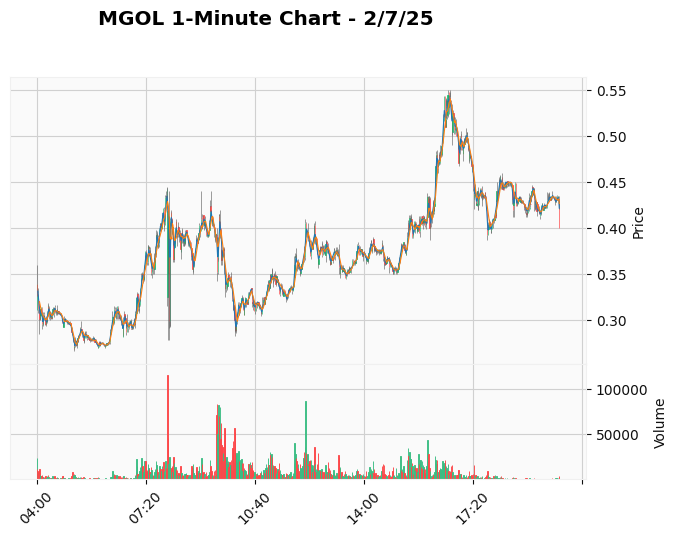

In [17]:
import mplfinance as mpf

# Plot the candlestick chart
mpf.plot(
    df,
    type='candle',           # Use candlestick chart
    volume=True,             # Plot volume in a sub-panel
    title='MGOL 1-Minute Chart - 2/7/25',
    style='yahoo',           # You can choose from several pre-defined styles
    mav=(3, 6)               # Optionally, add moving averages (e.g., 3-period and 6-period)
)


In [ ]:
# Example preprocessing
data['returns'] = data['close'].pct_change()
data['ma_10'] = data['close'].rolling(window=10).mean()
data['ma_50'] = data['close'].rolling(window=50).mean()

# Drop NaN values
data = data.dropna()

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume', 'returns', 'ma_10', 'ma_50']])